# **Pedido normal 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",	"c1.2",	"c1.3",	"c1.4",	"c2.1",	"c2.2",	"c2.3",	"c2.4",	"c.produccion_norm",	"c.produccion_ext",	"h"]])
targets = np.asarray(data["pedido_normal1"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

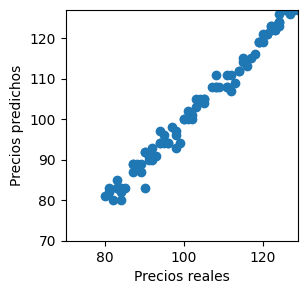

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(70,targets.max())
plt.ylim(70,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[1.250e+02, 1.220e+02, 1.050e+02, 1.360e+02, 9.400e+01, 1.180e+02,
        8.500e+01, 8.700e+01, 4.700e+01, 5.000e+01, 6.400e+01, 7.400e+01,
        6.420e+00, 8.860e+00, 1.400e-01],
       [1.050e+02, 1.370e+02, 1.530e+02, 1.830e+02, 1.080e+02, 1.090e+02,
        1.200e+02, 8.800e+01, 4.900e+01, 6.700e+01, 7.900e+01, 7.800e+01,
        6.350e+00, 8.250e+00, 1.200e-01],
       [1.020e+02, 1.580e+02, 1.120e+02, 9.400e+01, 1.270e+02, 8.900e+01,
        9.700e+01, 1.120e+02, 4.400e+01, 7.500e+01, 8.600e+01, 8.200e+01,
        5.520e+00, 9.250e+00, 1.200e-01],
       [1.540e+02, 9.000e+01, 1.480e+02, 1.270e+02, 1.030e+02, 1.150e+02,
        1.170e+02, 8.400e+01, 7.100e+01, 4.500e+01, 7.600e+01, 6.200e+01,
        6.260e+00, 8.190e+00, 1.000e-01],
       [1.010e+02, 1.550e+02, 1.390e+02, 1.550e+02, 1.270e+02, 1.160e+02,
        1.090e+02, 1.050e+02, 8.800e+01, 7.400e+01, 4.000e+01, 5.800e+01,
        5.940e+00, 9.890e+00, 6.000e-02],
       [1.730e+02, 1.580e+02, 1.070e+02, 1.840e+02

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,	70,	98,	185,	208,	166,	5.11,	8.64,	0.1]])

In [ ]:
cop

array([90.])

# **Pedido normal 2**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1"]])
targets = np.asarray(data["pedido_normal2"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

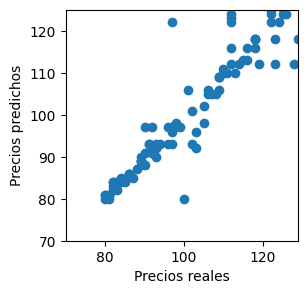

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(70,targets.max())
plt.ylim(70,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[2.080e+02, 1.510e+02, 1.860e+02, 1.830e+02, 1.230e+02, 8.900e+01,
        1.220e+02, 1.290e+02, 7.600e+01, 6.100e+01, 5.900e+01, 5.700e+01,
        6.210e+00, 8.510e+00, 1.000e-01, 1.230e+02],
       [1.680e+02, 1.730e+02, 1.290e+02, 1.460e+02, 1.140e+02, 8.400e+01,
        1.060e+02, 9.100e+01, 5.800e+01, 8.700e+01, 6.700e+01, 7.400e+01,
        5.980e+00, 9.820e+00, 1.400e-01, 1.140e+02],
       [1.010e+02, 1.550e+02, 1.390e+02, 1.550e+02, 1.270e+02, 1.160e+02,
        1.090e+02, 1.050e+02, 8.800e+01, 7.400e+01, 4.000e+01, 5.800e+01,
        5.940e+00, 9.890e+00, 6.000e-02, 1.270e+02],
       [1.600e+02, 1.550e+02, 1.900e+02, 9.600e+01, 1.170e+02, 9.900e+01,
        9.500e+01, 8.000e+01, 7.000e+01, 5.000e+01, 5.100e+01, 5.700e+01,
        6.660e+00, 8.190e+00, 1.200e-01, 1.170e+02],
       [1.330e+02, 1.740e+02, 1.260e+02, 1.440e+02, 1.180e+02, 1.290e+02,
        9.100e+01, 1.200e+02, 4.200e+01, 5.800e+01, 8.800e+01, 7.400e+01,
        5.450e+00, 9.600e+00, 1.000e-01, 1.180e+

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90]])

In [ ]:
cop

array([100.])

# **Pedido normal 3**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2"]])
targets = np.asarray(data["pedido_normal3"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

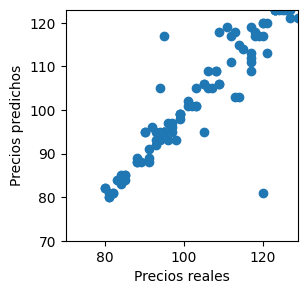

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(70,targets.max())
plt.ylim(70,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[2.050e+02, 2.030e+02, 1.190e+02, 1.240e+02, 1.010e+02, 1.140e+02,
        9.500e+01, 1.080e+02, 7.000e+01, 6.500e+01, 4.700e+01, 6.300e+01,
        6.860e+00, 9.030e+00, 1.400e-01, 1.010e+02, 1.140e+02],
       [1.880e+02, 1.410e+02, 1.300e+02, 1.980e+02, 8.000e+01, 1.240e+02,
        1.030e+02, 9.700e+01, 7.600e+01, 4.500e+01, 8.500e+01, 6.000e+01,
        6.240e+00, 8.950e+00, 1.500e-01, 8.000e+01, 1.240e+02],
       [1.670e+02, 1.550e+02, 2.070e+02, 9.600e+01, 1.120e+02, 8.700e+01,
        1.090e+02, 1.070e+02, 4.200e+01, 5.300e+01, 8.200e+01, 7.600e+01,
        5.030e+00, 8.750e+00, 1.000e-01, 1.120e+02, 8.700e+01],
       [2.020e+02, 1.030e+02, 2.020e+02, 1.610e+02, 1.270e+02, 1.070e+02,
        1.080e+02, 8.100e+01, 5.300e+01, 8.100e+01, 7.900e+01, 5.200e+01,
        5.370e+00, 9.980e+00, 1.500e-01, 1.270e+02, 1.030e+02],
       [1.680e+02, 1.730e+02, 1.290e+02, 1.460e+02, 1.140e+02, 8.400e+01,
        1.060e+02, 9.100e+01, 5.800e+01, 8.700e+01, 6.700e+01, 7.400e+01,
    

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100]])

In [ ]:
cop

array([120.])

# **Pedido normal 4**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3"]])
targets = np.asarray(data["pedido_normal4"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

1.0

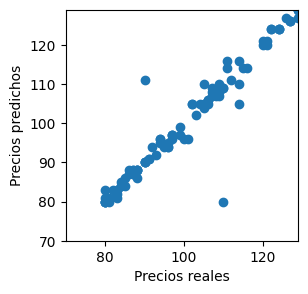

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(70,targets.max())
plt.ylim(70,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[2.080e+02, 1.510e+02, 1.860e+02, 1.830e+02, 1.230e+02, 8.900e+01,
        1.220e+02, 1.290e+02, 7.600e+01, 6.100e+01, 5.900e+01, 5.700e+01,
        6.210e+00, 8.510e+00, 1.000e-01, 1.230e+02, 8.900e+01, 1.220e+02],
       [1.870e+02, 9.700e+01, 1.330e+02, 1.360e+02, 9.200e+01, 1.050e+02,
        1.270e+02, 8.000e+01, 8.400e+01, 5.600e+01, 6.800e+01, 5.100e+01,
        6.830e+00, 9.940e+00, 6.000e-02, 9.200e+01, 9.700e+01, 1.270e+02],
       [1.910e+02, 1.350e+02, 1.140e+02, 1.550e+02, 1.020e+02, 1.060e+02,
        1.200e+02, 1.100e+02, 6.800e+01, 4.700e+01, 7.100e+01, 4.000e+01,
        6.420e+00, 8.140e+00, 6.000e-02, 1.020e+02, 1.060e+02, 1.140e+02],
       [1.010e+02, 1.550e+02, 1.390e+02, 1.550e+02, 1.270e+02, 1.160e+02,
        1.090e+02, 1.050e+02, 8.800e+01, 7.400e+01, 4.000e+01, 5.800e+01,
        5.940e+00, 9.890e+00, 6.000e-02, 1.270e+02, 1.160e+02, 1.090e+02],
       [1.440e+02, 1.580e+02, 1.540e+02, 1.900e+02, 8.900e+01, 9.700e+01,
        1.290e+02, 8.200e+01, 7.90

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120]])

In [ ]:
cop

array([110.])

# **Pedido extra 1**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3",
                            "pedido_normal4"]])
targets = np.asarray(data["pedido_extra1"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

9.0

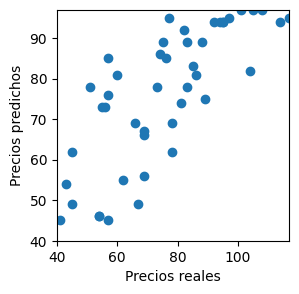

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(40,targets.max())
plt.ylim(40,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[2.050e+02, 2.030e+02, 1.190e+02, 1.240e+02, 1.010e+02, 1.140e+02,
        9.500e+01, 1.080e+02, 7.000e+01, 6.500e+01, 4.700e+01, 6.300e+01,
        6.860e+00, 9.030e+00, 1.400e-01, 1.010e+02, 1.140e+02, 9.500e+01,
        1.080e+02],
       [1.030e+02, 1.290e+02, 1.170e+02, 1.460e+02, 9.800e+01, 1.230e+02,
        8.800e+01, 1.020e+02, 7.600e+01, 7.400e+01, 8.500e+01, 6.000e+01,
        5.990e+00, 9.150e+00, 1.000e-01, 9.800e+01, 1.230e+02, 8.800e+01,
        1.020e+02],
       [1.630e+02, 1.210e+02, 1.470e+02, 1.000e+02, 9.700e+01, 9.700e+01,
        8.500e+01, 1.090e+02, 5.200e+01, 6.100e+01, 4.400e+01, 7.200e+01,
        5.320e+00, 8.620e+00, 1.500e-01, 9.700e+01, 9.700e+01, 8.500e+01,
        1.000e+02],
       [1.330e+02, 1.740e+02, 1.260e+02, 1.440e+02, 1.180e+02, 1.290e+02,
        9.100e+01, 1.200e+02, 4.200e+01, 5.800e+01, 8.800e+01, 7.400e+01,
        5.450e+00, 9.600e+00, 1.000e-01, 1.180e+02, 1.290e+02, 9.100e+01,
        1.200e+02],
       [9.800e+01, 1.210e+02, 1.

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120,110]])

In [ ]:
cop

array([8.])

# **Pedido extra 2**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3",
                            "pedido_normal4","pedido_extra1"]])
targets = np.asarray(data["pedido_extra2"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

12.0

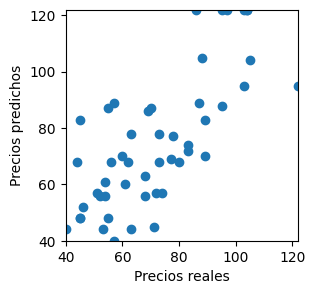

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(40,targets.max())
plt.ylim(40,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[1.240e+02, 1.710e+02, 9.100e+01, 1.940e+02, 1.240e+02, 1.230e+02,
        8.400e+01, 8.000e+01, 7.500e+01, 8.100e+01, 4.600e+01, 4.800e+01,
        5.540e+00, 8.890e+00, 7.000e-02, 1.240e+02, 1.230e+02, 8.400e+01,
        8.000e+01, 0.000e+00],
       [1.670e+02, 1.550e+02, 2.070e+02, 9.600e+01, 1.120e+02, 8.700e+01,
        1.090e+02, 1.070e+02, 4.200e+01, 5.300e+01, 8.200e+01, 7.600e+01,
        5.030e+00, 8.750e+00, 1.000e-01, 1.120e+02, 8.700e+01, 1.090e+02,
        9.600e+01, 5.500e+01],
       [1.630e+02, 1.210e+02, 1.470e+02, 1.000e+02, 9.700e+01, 9.700e+01,
        8.500e+01, 1.090e+02, 5.200e+01, 6.100e+01, 4.400e+01, 7.200e+01,
        5.320e+00, 8.620e+00, 1.500e-01, 9.700e+01, 9.700e+01, 8.500e+01,
        1.000e+02, 6.600e+01],
       [1.480e+02, 1.780e+02, 1.210e+02, 1.470e+02, 1.190e+02, 9.000e+01,
        9.100e+01, 8.000e+01, 4.500e+01, 7.000e+01, 5.500e+01, 4.400e+01,
        6.700e+00, 9.560e+00, 6.000e-02, 1.190e+02, 9.000e+01, 9.100e+01,
        8.000e+01, 

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120,110,8]])

In [ ]:
cop

array([85.])

# **Pedido extra 3**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3",
                            "pedido_normal4","pedido_extra1", "pedido_extra2"]])
targets = np.asarray(data["pedido_extra3"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

10.0

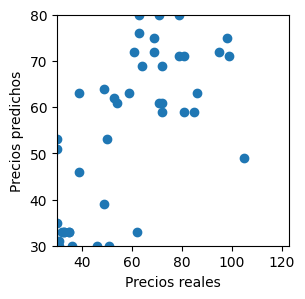

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[2.050e+02, 2.030e+02, 1.190e+02, 1.240e+02, 1.010e+02, 1.140e+02,
        9.500e+01, 1.080e+02, 7.000e+01, 6.500e+01, 4.700e+01, 6.300e+01,
        6.860e+00, 9.030e+00, 1.400e-01, 1.010e+02, 1.140e+02, 9.500e+01,
        1.080e+02, 1.040e+02, 8.900e+01],
       [1.240e+02, 1.710e+02, 9.100e+01, 1.940e+02, 1.240e+02, 1.230e+02,
        8.400e+01, 8.000e+01, 7.500e+01, 8.100e+01, 4.600e+01, 4.800e+01,
        5.540e+00, 8.890e+00, 7.000e-02, 1.240e+02, 1.230e+02, 8.400e+01,
        8.000e+01, 0.000e+00, 4.800e+01],
       [1.810e+02, 9.300e+01, 1.950e+02, 1.770e+02, 1.210e+02, 1.030e+02,
        1.230e+02, 1.140e+02, 8.700e+01, 4.200e+01, 5.200e+01, 6.000e+01,
        6.020e+00, 9.420e+00, 9.000e-02, 1.210e+02, 9.300e+01, 1.230e+02,
        1.140e+02, 6.000e+01, 0.000e+00],
       [2.030e+02, 1.860e+02, 1.530e+02, 2.000e+02, 1.290e+02, 8.100e+01,
        1.180e+02, 1.120e+02, 5.700e+01, 6.000e+01, 4.300e+01, 8.700e+01,
        5.750e+00, 8.100e+00, 1.500e-01, 1.290e+02, 8.100e+0

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120,110,8,85]])

In [ ]:
cop

array([88.])

# **Pedido extra 4**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3",
                            "pedido_normal4","pedido_extra1", "pedido_extra2","pedido_extra3"]])
targets = np.asarray(data["pedido_extra4"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

7.0

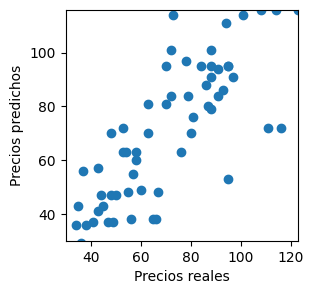

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(30,targets.max())
plt.ylim(30,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[1.770e+02, 1.030e+02, 1.170e+02, 1.330e+02, 1.000e+02, 8.900e+01,
        1.280e+02, 1.290e+02, 6.400e+01, 5.600e+01, 7.000e+01, 7.100e+01,
        6.470e+00, 9.940e+00, 9.000e-02, 1.000e+02, 8.900e+01, 1.170e+02,
        1.290e+02, 7.700e+01, 1.400e+01, 0.000e+00],
       [1.030e+02, 1.290e+02, 1.170e+02, 1.460e+02, 9.800e+01, 1.230e+02,
        8.800e+01, 1.020e+02, 7.600e+01, 7.400e+01, 8.500e+01, 6.000e+01,
        5.990e+00, 9.150e+00, 1.000e-01, 9.800e+01, 1.230e+02, 8.800e+01,
        1.020e+02, 5.000e+00, 6.000e+00, 2.900e+01],
       [1.870e+02, 9.700e+01, 1.330e+02, 1.360e+02, 9.200e+01, 1.050e+02,
        1.270e+02, 8.000e+01, 8.400e+01, 5.600e+01, 6.800e+01, 5.100e+01,
        6.830e+00, 9.940e+00, 6.000e-02, 9.200e+01, 9.700e+01, 1.270e+02,
        8.000e+01, 9.500e+01, 0.000e+00, 6.000e+00],
       [1.680e+02, 1.730e+02, 1.290e+02, 1.460e+02, 1.140e+02, 8.400e+01,
        1.060e+02, 9.100e+01, 5.800e+01, 8.700e+01, 6.700e+01, 7.400e+01,
        5.980e+00, 9.820e+0

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120,110,8,85,88]])

In [ ]:
cop

array([56.])

# **c.inventario**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_dinamico_sin_preparacion")
data

,mes1,mes2,mes3,mes4,D1,D2,D3,D4,c1.1,c1.2,...,h,pedido_normal1,pedido_normal2,pedido_normal3,pedido_normal4,pedido_extra1,pedido_extra2,pedido_extra3,pedido_extra4,c.inventario
0,1,2,3,4,90,100,120,110,50,60,...,0.10,90,100,120,110,8,85,88,56,4191.36
1,1,2,3,4,205,203,119,124,101,114,...,0.14,101,114,95,108,104,89,24,16,4973.13
2,1,2,3,4,125,122,105,136,94,118,...,0.14,94,118,85,87,31,4,20,49,3386.78
3,1,2,3,4,177,103,117,133,100,89,...,0.09,100,89,117,129,77,14,0,4,3759.72
4,1,2,3,4,124,171,91,194,124,123,...,0.07,124,123,84,80,0,48,7,114,3778.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,2,3,4,130,113,152,205,94,89,...,0.20,94,89,123,94,36,24,29,111,9596.79
95,1,2,3,4,95,189,90,182,84,116,...,0.64,84,116,90,129,11,73,0,53,8345.23
96,1,2,3,4,195,175,209,194,82,112,...,0.63,82,112,128,106,113,63,81,88,11994.68
97,1,2,3,4,180,138,115,130,83,94,...,0.18,83,94,82,120,97,44,33,10,9273.74


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["D1",	"D2",	"D3",	"D4",	"c1.1",
                            "c1.2",	"c1.3",	"c1.4",	"c2.1",
                            "c2.2",	"c2.3",	"c2.4",
                            "c.produccion_norm",
                            "c.produccion_ext",	"h","pedido_normal1","pedido_normal2","pedido_normal3",
                            "pedido_normal4","pedido_extra1", "pedido_extra2","pedido_extra3","pedido_extra4"]])
targets = np.asarray(data["c.inventario"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 25)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

516.9099999999999

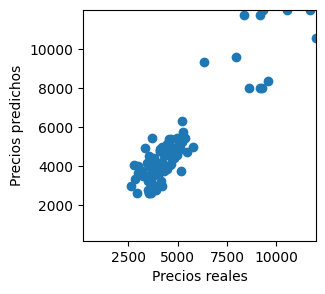

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(200,targets.max())
plt.ylim(200,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[1.240e+02, 1.710e+02, 9.100e+01, 1.940e+02, 1.240e+02, 1.230e+02,
        8.400e+01, 8.000e+01, 7.500e+01, 8.100e+01, 4.600e+01, 4.800e+01,
        5.540e+00, 8.890e+00, 7.000e-02, 1.240e+02, 1.230e+02, 8.400e+01,
        8.000e+01, 0.000e+00, 4.800e+01, 7.000e+00, 1.140e+02],
       [2.040e+02, 1.700e+02, 1.920e+02, 1.010e+02, 1.230e+02, 1.020e+02,
        8.400e+01, 1.130e+02, 8.800e+01, 4.800e+01, 5.400e+01, 7.400e+01,
        6.170e+00, 9.230e+00, 9.000e-02, 1.230e+02, 1.020e+02, 8.400e+01,
        1.010e+02, 8.100e+01, 6.800e+01, 1.080e+02, 0.000e+00],
       [1.880e+02, 1.410e+02, 1.300e+02, 1.980e+02, 8.000e+01, 1.240e+02,
        1.030e+02, 9.700e+01, 7.600e+01, 4.500e+01, 8.500e+01, 6.000e+01,
        6.240e+00, 8.950e+00, 1.500e-01, 8.000e+01, 1.240e+02, 1.030e+02,
        9.700e+01, 1.080e+02, 1.700e+01, 2.700e+01, 1.010e+02],
       [2.080e+02, 1.510e+02, 1.860e+02, 1.830e+02, 1.230e+02, 8.900e+01,
        1.220e+02, 1.290e+02, 7.600e+01, 6.100e+01, 5.900e+01, 5.700

In [ ]:
cop = d_tree.predict([[90,	100,	120,	110,	50,	60,	80,
                       70,	98,	185,	208,	166,	5.11,	8.64,	0.1,90,100,120,110,8,85,88,56]])

In [ ]:
cop

array([4191.36])